## **[1] 실습 데이터 준비**

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataDreamworks/패스트캠퍼스/커머스/class01/data/merge_trans_cust_prod_240327.csv')
df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-04-01,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store
3,271544,1986-05-08,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop
4,273203,1984-02-29,29,M,2.0,Ordered,1.0,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop


In [ ]:
# 데이터 속성 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            22933 non-null  int64  
 1   dob                22933 non-null  object 
 2   age                22933 non-null  int64  
 3   gender             22933 non-null  object 
 4   city_code          22933 non-null  float64
 5   order_status       22933 non-null  object 
 6   confirmed_yn       22933 non-null  float64
 7   transaction_id     22933 non-null  int64  
 8   tran_date          22933 non-null  object 
 9   prod_cat_code      22933 non-null  int64  
 10  prod_sub_cat_code  22933 non-null  int64  
 11  prod_cat           22933 non-null  object 
 12  prod_subcat        22933 non-null  object 
 13  qty                22933 non-null  int64  
 14  rate               22933 non-null  int64  
 15  tax                22933 non-null  float64
 16  total_amt          229

## **[2] 탐색적데이터분석(EDA)**

### **Q1 : 연령 구간 나눠서 조건별 고객수 집계**
- <font color='blue'>**[분석 주제]**</font> <mark>**2011년 시점을 기준으로 5세 단위로 연령 구간을 나누고 각 성별(gender), 연령 구간별로 고객수 집계**</mark>(단, 고객의 성별, 연령 정보를 구할 수 없을 경우 해당 데이터는 집계에서 제외)

- <font color='blue'>**[분석 결과]**</font>
<ul style="list-style-type: square;">
<font color='brown'><b>
  <li>20대 후반~30대 후반까지의 고객이 많음</li>
  <li>전 연령대에서 여성 고객보다는 남성고객이 더 많음</b></font></li>
</ul>


In [ ]:
# object 타입의 tran_date 컬럼을 데이트 타입으로 변경하기
df['tran_date'] = pd.to_datetime(df['tran_date'])

In [ ]:
df['tran_date'].describe()

count                            22933
mean     2012-08-09 03:20:25.849212928
min                2011-01-25 00:00:00
25%                2011-11-02 00:00:00
50%                2012-08-11 00:00:00
75%                2013-05-17 00:00:00
max                2014-02-28 00:00:00
Name: tran_date, dtype: object

In [ ]:
# 최소값 = 19세, 최대값 = 44세
df['age'].describe()

count    22933.000000
mean        31.079144
std          6.680791
min         19.000000
25%         25.000000
50%         31.000000
75%         37.000000
max         44.000000
Name: age, dtype: float64

In [ ]:
# 5세 단위로 나누기
# 19~24 / 25~29 / 30~34 / 35~39 / 40~44

df.insert(2, 'AgeGroup', "", None)

# age 구간 나눠주기
bins = [18, 24, 29, 34, 39, 44]
labels = ['early 20s', 'late 20s', 'early 30s', 'late 30s', 'early 40s']

# age 구간에 따른 AgeGroup 컬럼 만들기
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
df.iloc[:3]

,cust_id,dob,AgeGroup,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,late 30s,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,early 40s,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-04-01,early 40s,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store


In [ ]:
# 성별 및 연령 컬럼의 결측치 확인하기
print('성별 결측치 확인: ', df['gender'].isnull().sum())
print('연령 결측치 확인: ',  df['age'].isnull().sum())

성별 결측치 확인:  0
연령 결측치 확인:  0


In [ ]:
# AgeGroup과 gender에 따른 인원 파악하기
df.groupby(['AgeGroup', 'gender'])['cust_id'].count()

AgeGroup   gender 
early 20s  F          1882
           M          1984
           unknown       0
late 20s   F          2489
           M          2553
           unknown       0
early 30s  F          2368
           M          2605
           unknown       0
late 30s   F          2494
           M          2556
           unknown       0
early 40s  F          1915
           M          2032
           unknown       9
Name: cust_id, dtype: int64

In [ ]:
# early 40s의 unknown 9명 데이터 제외하기
df = df[df['gender']!= 'unknown']

In [ ]:
CountByAgeGroupAndGender = df.groupby(['AgeGroup', 'gender'])['cust_id'].count().reset_index()
CountByAgeGroupAndGender.columns = ['AgeGroup', 'gender', 'count']

In [ ]:
CountByAgeGroupAndGender

,AgeGroup,gender,count
0,early 20s,F,1882
1,early 20s,M,1984
2,late 20s,F,2489
3,late 20s,M,2553
4,early 30s,F,2368
5,early 30s,M,2605
6,late 30s,F,2494
7,late 30s,M,2556
8,early 40s,F,1915
9,early 40s,M,2032


#### **막대 그래프**

In [ ]:
# 한국어 폰트 설정
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/content/drive/MyDrive/Colab Notebooks/font/NanumGothicBold.ttf'

# 폰트 매니저에 한국어 폰트 추가
fm.fontManager.addfont(font_path)

# 폰트 설정
font_properties = fm.FontProperties(fname=font_path)

<ipython-input-20-b9e2d0f15c08>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=a, x='AgeGroup', y='count', hue='gender', ci=False, palette=custom_palette)


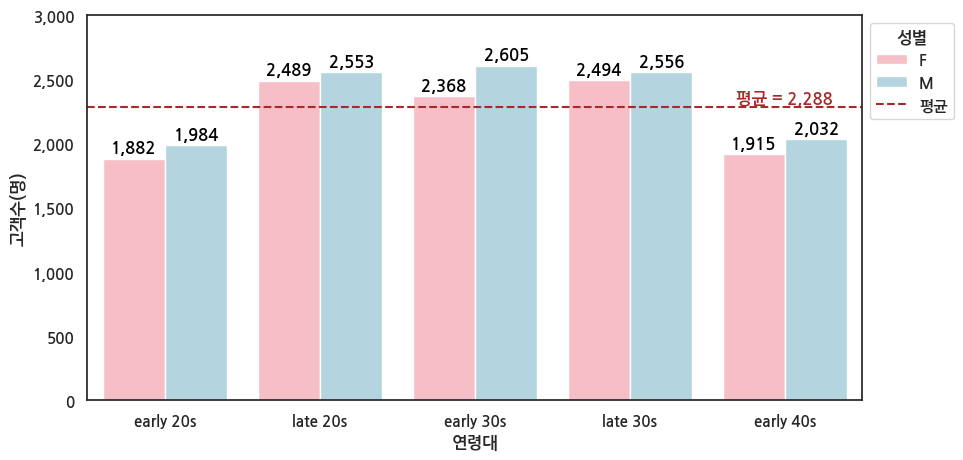

In [ ]:
# 위에서 집계한 데이터를 기준으로 연령/성별 통계를 확인할 수 있는 데이터 시각화
import matplotlib.ticker as ticker
# 백그라운드 하얀색으로 설정
sns.set_style("white")

# 기본 글꼴 설정
plt.rcParams['font.size'] = 12

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.rc('font', family=font_properties.get_name())

# 집계한 데이터를 변수명 a로 저장
a = CountByAgeGroupAndGender

# 라벨에 따른 그래프 색 설정
custom_palette = {'F': 'lightpink', 'M': 'lightblue'}
# barplot 그리기
sns.barplot(data=a, x='AgeGroup', y='count', hue='gender', ci=False, palette=custom_palette)

# y축 라벨 설정
plt.ylabel('고객수(명)')

# x축 라벨 설정
plt.xlabel('연령대')

# 천만원 단위로 값에 쉼표(,) 넣어주기
formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

for index, row in a.iterrows():
    if row.gender == 'F':
      plt.text(index/2-0.35,
              row['count'] + 50,
              f"{row['count']:,.0f}",
              color='black', ha="left")

    else:
      plt.text((index-1)/2+0.35,
              row['count'] + 50,
              f"{row['count']:,.0f}",
              color='black', ha="right")

# 연령대 및 성별의 평균값 넣기
overall_mean_count = a['count'].mean()
plt.axhline(y=overall_mean_count, color='brown', linestyle='--', label='평균')
plt.text(4, overall_mean_count+30, f"평균 = {overall_mean_count:,.0f}", color='brown', ha="center")

plt.ylim(0, 3000)
plt.legend(title = '성별', loc='best', bbox_to_anchor=(1,1))


plt.show()

In [ ]:
CountByAgeGroupAndGender

,AgeGroup,gender,count
0,early 20s,F,1882
1,early 20s,M,1984
2,late 20s,F,2489
3,late 20s,M,2553
4,early 30s,F,2368
5,early 30s,M,2605
6,late 30s,F,2494
7,late 30s,M,2556
8,early 40s,F,1915
9,early 40s,M,2032


In [ ]:
CountByAgeGroupAndGender_v2 = CountByAgeGroupAndGender.pivot(index='AgeGroup', columns = 'gender', values='count').reset_index()
CountByAgeGroupAndGender_v2['TotalCount'] = CountByAgeGroupAndGender_v2['F'] + CountByAgeGroupAndGender_v2['M']
CountByAgeGroupAndGender_v2

gender,AgeGroup,F,M,TotalCount
0,early 20s,1882,1984,3866
1,late 20s,2489,2553,5042
2,early 30s,2368,2605,4973
3,late 30s,2494,2556,5050
4,early 40s,1915,2032,3947


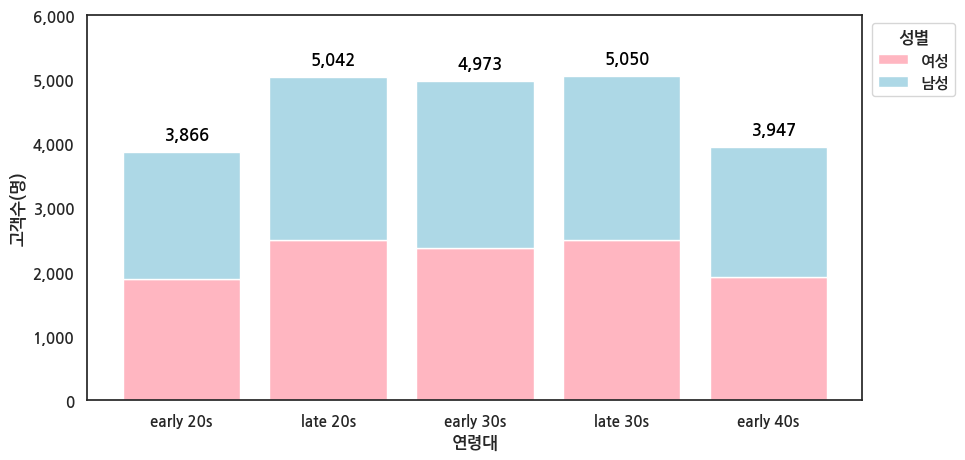

In [ ]:
plt.figure(figsize=(10, 5))
plt.rc('font', family=font_properties.get_name())

count_data = CountByAgeGroupAndGender_v2['AgeGroup']
f_data = CountByAgeGroupAndGender_v2['F']
m_data = CountByAgeGroupAndGender_v2['M']

# 천만원 단위로 값에 쉼표(,) 넣어주기
formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

bar1 = plt.bar(count_data, f_data, color='lightpink', label='여성')
bar2 = plt.bar(count_data, m_data, bottom=f_data, color='lightblue', label='남성')

for index, row in CountByAgeGroupAndGender_v2.iterrows():
      plt.text(index-0.12,
              row['TotalCount'] + 200,
              f"{row['TotalCount']:,.0f}",
              color='black')

plt.ylim(0, 6000)

# y축 라벨 설정
plt.ylabel('고객수(명)')

# x축 라벨 설정
plt.xlabel('연령대')

plt.legend(title = '성별', loc='best', bbox_to_anchor=(1.13,1))


plt.show()

#### **피라미드 그래프**

In [ ]:
CountByAgeGroupAndGender

,AgeGroup,gender,count
0,early 20s,F,1882
1,early 20s,M,1984
2,late 20s,F,2489
3,late 20s,M,2553
4,early 30s,F,2368
5,early 30s,M,2605
6,late 30s,F,2494
7,late 30s,M,2556
8,early 40s,F,1915
9,early 40s,M,2032


In [ ]:
# 피라미드 그래프 그리기 위한 데이터 형태 변형
CountByAgeGroupAndGender_v2 = CountByAgeGroupAndGender.pivot(index='AgeGroup', columns='gender', values='count').reset_index()
CountByAgeGroupAndGender_v2

gender,AgeGroup,F,M
0,early 20s,1882,1984
1,late 20s,2489,2553
2,early 30s,2368,2605
3,late 30s,2494,2556
4,early 40s,1915,2032


In [ ]:
# 피라미드 차트로 나타내기 위한 데이터 전처리
# 여성과 관련된 지표는 왼쪽에, 남성과 관련된 지표는 오른쪽에 그리기 위해서 F 컬럼에 -1 곱한 값 구하기

age_grp = CountByAgeGroupAndGender_v2['AgeGroup']
female_data = CountByAgeGroupAndGender_v2['F']*-1
male_data = CountByAgeGroupAndGender_v2['M']

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()

# 여성 관련 데이터
fig.add_trace(go.Bar(x = female_data,
                    y = age_grp,
                    name = '여성',
                    orientation = 'h',
                    text = -1*female_data))
# 남성 관련 데이터
fig.add_trace(go.Bar(x = male_data,
                    y = age_grp,
                    name = '남성',
                    orientation = 'h',
                    text = male_data))

# 세부사항 수정하기
fig.update_layout(title = '연령대/성별 고객 수 현황',
                 title_font_size = 22,
                 barmode = 'overlay',
                 bargap = 0.0,
                 bargroupgap = 0,
                 xaxis = dict(tickvals = [-2500, -2000, -1500, -1000, -500, 0, 500, 1000, 1500, 2000, 2500],
                             ticktext = ['2천 5백명', '2천명', '1천 5백명', '1천명', '5백명', '0', '5백명', '1천명', '1천 5백명', '2천명', '2천 5백명'],
                             title = '고객 수(백명)',
                             title_font_size = 14)
                  )

fig.show()

### **Q2 : 구매 경과일수 및 구매주기**
- <font color='blue'>**[분석 주제]**</font> <mark>**2013년 2월 28일을 기준으로 각 고객의 구매 경과일수 및 구매주기 구하기** </mark>
<ul style="list-style-type: square;">
  <li>구매 경과일수 = 기준일 - 마지막 구매일</font></li>
  <li>구매주기 = (마지막 구매일 - 첫 구매일)/(총 구매 일수 - 1)</li>
</ul>
<br>
- <font color='blue'>**[분석 결과]**</font>
<ul style="list-style-type: square;">
  <li><font color='brown'><b>1인당 평균 구매일수는 3일</b></font></li>
  <li>2013-02-28기준으로 구매 경과일수를 구한 결과 <font color='brown'><b>평균 구매 경과일수는 약 6.3개월 (평균: 199일/중앙값 : 151일)</b></font></li>
  <li>대부분 유저의 경우 <font color='brown'><b>약 5개월(151일) 이내 구매 이력이 존재</b></font></li>
</ul>


In [ ]:
# tran_date 컬럼 형 변환(날짜형)
df["tran_date"] = pd.to_datetime(df["tran_date"], format='%Y-%m-%d')

## df 데이터 타입 확인
df.dtypes

cust_id                       int64
dob                          object
AgeGroup                   category
age                           int64
gender                       object
city_code                   float64
order_status                 object
confirmed_yn                float64
transaction_id                int64
tran_date            datetime64[ns]
prod_cat_code                 int64
prod_sub_cat_code             int64
prod_cat                     object
prod_subcat                  object
qty                           int64
rate                          int64
tax                         float64
total_amt                   float64
store_type                   object
dtype: object

In [ ]:
# 2013년 2월 28일 이전까지 데이터만 필터(2013년 2월 28일 포함)
df_20130228 = df[df['tran_date'] <= pd.to_datetime('2013-02-28')].reset_index(drop=True)
df_20130228.sort_values(by='tran_date', ascending=False).head()

,cust_id,dob,AgeGroup,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
4880,273805,1975-08-16,late 30s,38,M,10.0,Ordered,1.0,31384159740,2013-02-28,5,3,Books,Comics,2,435,91.350,961.350,e-Shop
1389,272803,1974-10-23,early 40s,39,M,7.0,Canceled,0.0,8959366903,2013-02-28,2,3,Footwear,Women,-3,-780,245.700,-2585.700,TeleShop
11174,269848,1992-07-03,early 20s,21,M,6.0,Ordered,1.0,71793238090,2013-02-28,5,10,Books,Non-Fiction,1,1083,113.715,1196.715,e-Shop
4284,270929,1990-03-28,early 20s,23,F,7.0,Ordered,1.0,27519215210,2013-02-28,3,8,Electronics,Personal Appliances,5,159,83.475,878.475,e-Shop
9427,267233,1987-08-21,late 20s,26,F,10.0,Ordered,1.0,60661330238,2013-02-28,4,4,Bags,Women,2,1033,216.930,2282.930,e-Shop


In [ ]:
print('전체 고객수 :', len(df['cust_id'].unique()))
print('2013년 2월 28일 이전에 주문한 내역이 있는 고객수 :', len(df_20130228['cust_id'].unique()))
print('2013년 2월 28일 이후에 주문한 내역이 있는 고객수 :', len(df[~df['cust_id'].isin(df_20130228['cust_id'].unique().tolist())]['cust_id'].unique()))

전체 고객수 : 5504
2013년 2월 28일 이전에 주문한 내역이 있는 고객수 : 5187
2013년 2월 28일 이후에 주문한 내역이 있는 고객수 : 317


In [ ]:
import numpy as np

# 고객별 첫 구매일, 마지막 구매일, 구매일수 합계 구하기
cust_ord_df = df_20130228.groupby('cust_id')['tran_date'].agg(
    fst_ord_date = np.min,
    last_ord_date = np.max,
    cnt_ord_days = np.size
).reset_index()

# 데이터 확인
cust_ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cust_id        5187 non-null   int64         
 1   fst_ord_date   5187 non-null   datetime64[ns]
 2   last_ord_date  5187 non-null   datetime64[ns]
 3   cnt_ord_days   5187 non-null   int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 162.2 KB


In [ ]:
cust_ord_df.head()

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days
0,266783,2011-09-23,2013-02-20,5
1,266784,2012-08-23,2012-12-04,3
2,266785,2011-03-15,2013-02-13,7
3,266788,2011-06-12,2013-02-12,4
4,266794,2011-03-18,2012-11-27,9


In [ ]:
# cust_ord_df가 각 cust_id 별로 잘 집계 됐는지 확인
print(len(cust_ord_df)) # 전체 테이블 row 개수
print(len(cust_ord_df['cust_id'].unique())) # unique cust_id 개수

5187
5187


In [ ]:
# 1인당 평균 구매일
print(round(cust_ord_df['cnt_ord_days'].mean(), 2))

# 1인당 구매일 중앙값
print(round(cust_ord_df['cnt_ord_days'].median(), 2))

3.01
3.0


In [ ]:
# 2013년 2월 28일 기준으로 구매 경과일수 계산
cust_ord_df['diff_ord_days'] = (pd.to_datetime('2013-02-28') - cust_ord_df['last_ord_date']).dt.days
cust_ord_df.head()

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days
0,266783,2011-09-23,2013-02-20,5,8
1,266784,2012-08-23,2012-12-04,3,86
2,266785,2011-03-15,2013-02-13,7,15
3,266788,2011-06-12,2013-02-12,4,16
4,266794,2011-03-18,2012-11-27,9,93


In [ ]:
# 구매주기 구하기
cust_ord_df['ord_cycle'] = np.where(cust_ord_df['cnt_ord_days'] == 1,
                                    pd.to_timedelta('0 days'),
                                    (cust_ord_df['last_ord_date'] - cust_ord_df['fst_ord_date']) / (cust_ord_df['cnt_ord_days'] - 1)
                                )

# ord_cycle을 정수로 변환
cust_ord_df['ord_cycle'] = (pd.to_timedelta(cust_ord_df['ord_cycle']).dt.total_seconds() / (24 * 60 * 60)).astype(int)

# 데이터 확인
cust_ord_df.head()

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle
0,266783,2011-09-23,2013-02-20,5,8,129
1,266784,2012-08-23,2012-12-04,3,86,51
2,266785,2011-03-15,2013-02-13,7,15,116
3,266788,2011-06-12,2013-02-12,4,16,203
4,266794,2011-03-18,2012-11-27,9,93,77


In [ ]:
## 2일 이상 구매 고객 데이터만 필터 후 통계 확인
cust_ord_df = cust_ord_df[cust_ord_df['cnt_ord_days'] > 1].reset_index(drop=True)
cust_ord_df.describe()

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle
count,4095.000000,4095,4095,4095.000000,4095.000000,4095.000000
mean,271032.709402,2011-08-13 02:43:09.890109952,2012-08-12 06:16:58.021978112,3.543101,199.738217,169.026129
min,266783.000000,2011-01-25 00:00:00,2011-02-02 00:00:00,2.000000,0.000000,0.000000
25%,268933.500000,2011-04-02 00:00:00,2012-05-05 00:00:00,2.000000,67.000000,87.000000
50%,271011.000000,2011-07-04 00:00:00,2012-09-30 00:00:00,3.000000,151.000000,139.000000
75%,273137.000000,2011-11-15 00:00:00,2012-12-23 00:00:00,4.000000,299.000000,217.000000
max,275265.000000,2013-02-24 00:00:00,2013-02-28 00:00:00,11.000000,757.000000,761.000000
std,2438.581913,NaN,NaN,1.477741,165.190372,124.701569


In [ ]:
print('2일 이상 구매한 고객수 : ', len(cust_ord_df))

2일 이상 구매한 고객수 :  4095


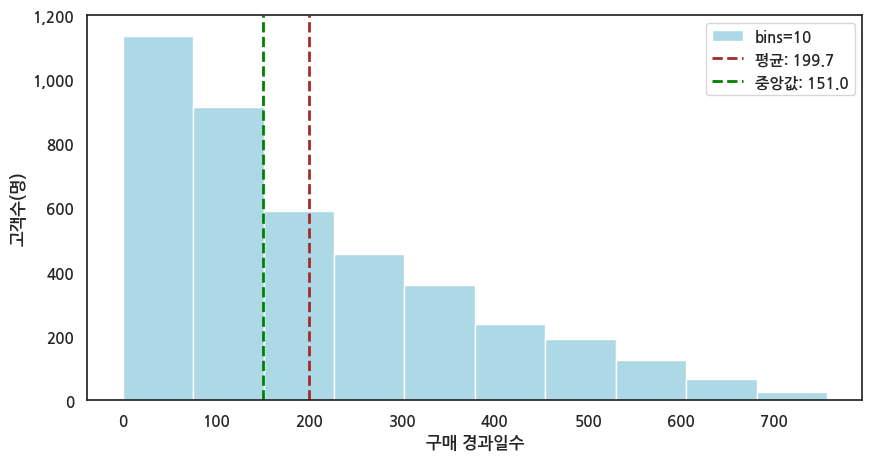

In [ ]:
diff_ord_days_df = cust_ord_df['diff_ord_days']

# 그래프 그리기
plt.figure(figsize=(10, 5))

# 구간을 10개로 나누어 히스토그램 시각화
plt.hist(diff_ord_days_df, bins = 10, label = 'bins=10',  color='lightblue')

# 평균 및 중앙값 계산
mean_val = np.mean(diff_ord_days_df)
median_val = np.median(diff_ord_days_df)

# 천만원 단위로 값에 쉼표(,) 넣어주기
formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

# 평균 및 중앙값을 선으로 표시
plt.axvline(mean_val, color='brown', linestyle='dashed', linewidth=2, label=f'평균: {mean_val:.1f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'중앙값: {median_val:.1f}')

# y축 라벨 설정
plt.ylabel('고객수(명)')

# x축 라벨 설정
plt.xlabel('구매 경과일수')

plt.ylim(0, 1200)

plt.legend()
plt.show()

#### **Q2-1 : 고객의 연령 구간, 성별에 따라서 구매경과일수와 구매주기의 차이가 있는지 확인**
- <font color='blue'>**[분석 주제]**</font> **2013년 2월 28일을 기준으로 <mark>1) 각 고객의 구매 경과일수 및 2) 구매주기가 '연령' 및 '성별'에 따라서 차이가 있는지 살펴보기** </mark>
<br>
- <font color='blue'>**[분석 결과]**</font>
<ul style="list-style-type: square;">
  <b><font color = 'blue'>[조건별 평균 구매경과일수]</font></b>
  <font color='brown'>
  <li><b>연령대와 성별에 무관하게 유사</b></font>하지만 <font color='brown'><b>근소하게 20대 초반 남성(약 6개월/187일)과 30대 초반 남성(약 6.3개월/191일)들의 평균 구매경과일수가 짧음</b></font></li>
  <br>
  <b><font color = 'blue'>[조건별 평균 구매주기]</font></b>
  <li><b><font color = 'brown'>연령대와 성별에 무관하게 유사</b></font>하지만 <font color='brown'><b>근소하게 20대 초반 여성(약 5.3개월/161일)과 20대 후반 여성(약 5.2개월/158일)들의 평균 구매주기가 짧음</b></font></li>
</ul>

- <font size = 4> **cust_ord_df 테이블에 df 테이블의 AgeGroup, age, gender 정보 추가하기**

In [ ]:
cust_ord_df.iloc[:3]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle
0,266783,2011-09-23,2013-02-20,5,8,129
1,266784,2012-08-23,2012-12-04,3,86,51
2,266785,2011-03-15,2013-02-13,7,15,116


In [ ]:
df_20130228.iloc[:2]

,cust_id,dob,AgeGroup,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,late 30s,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,271544,1986-05-08,late 20s,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop


In [ ]:
# 2013년을 기준으로 나이 계산하기 위해서 cust_ord_df에 gender, dbo 정보 추가하기
cust_ord_df_v2 = pd.merge(cust_ord_df, df_20130228[['cust_id', 'gender', 'dob']].drop_duplicates(),
                      how = 'left', on = 'cust_id')

In [ ]:
# str 타입 데이터를 datetime 타입 데이터로 변환
cust_ord_df_v2['dob'] = pd.to_datetime(cust_ord_df_v2['dob'])

In [ ]:
# 연나이 구하기
## 연 나이 = 2013년 - 생일 연도
cust_ord_df_v2['age'] = pd.Timestamp('2013-01-01').year - cust_ord_df_v2['dob'].dt.year

In [ ]:
cust_ord_df_v2.iloc[:5]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle,gender,dob,age
0,266783,2011-09-23,2013-02-20,5,8,129,M,1974-05-01,39
1,266784,2012-08-23,2012-12-04,3,86,51,F,1991-12-13,22
2,266785,2011-03-15,2013-02-13,7,15,116,F,1985-06-29,28
3,266788,2011-06-12,2013-02-12,4,16,203,F,1972-03-20,41
4,266794,2011-03-18,2012-11-27,9,93,77,F,1971-02-28,42


In [ ]:
# 2013년을 기준으로 고객들의 age 분포 살펴보기
cust_ord_df_v2['age'].describe()

count    4095.000000
mean       31.962149
std         6.615128
min        21.000000
25%        26.000000
50%        32.000000
75%        38.000000
max        43.000000
Name: age, dtype: float64

In [ ]:
# 5세 단위로 나누기
# 19~24 / 25~29 / 30~34 / 35~39 / 40~44

# age 구간 나눠주기
bins = [18, 24, 29, 34, 39, 44]
labels = ['early 20s', 'late 20s', 'early 30s', 'late 30s', 'early 40s']

# age 구간에 따른 AgeGroup 컬럼 만들기
cust_ord_df_v2['AgeGroup'] = pd.cut(cust_ord_df_v2['age'], bins=bins, labels=labels, right=False)

In [ ]:
cust_ord_df_v2.iloc[:3]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle,gender,dob,age,AgeGroup
0,266783,2011-09-23,2013-02-20,5,8,129,M,1974-05-01,39,early 40s
1,266784,2012-08-23,2012-12-04,3,86,51,F,1991-12-13,22,early 20s
2,266785,2011-03-15,2013-02-13,7,15,116,F,1985-06-29,28,late 20s


#####<font size = 4> **구매경과일수 박스플랏**

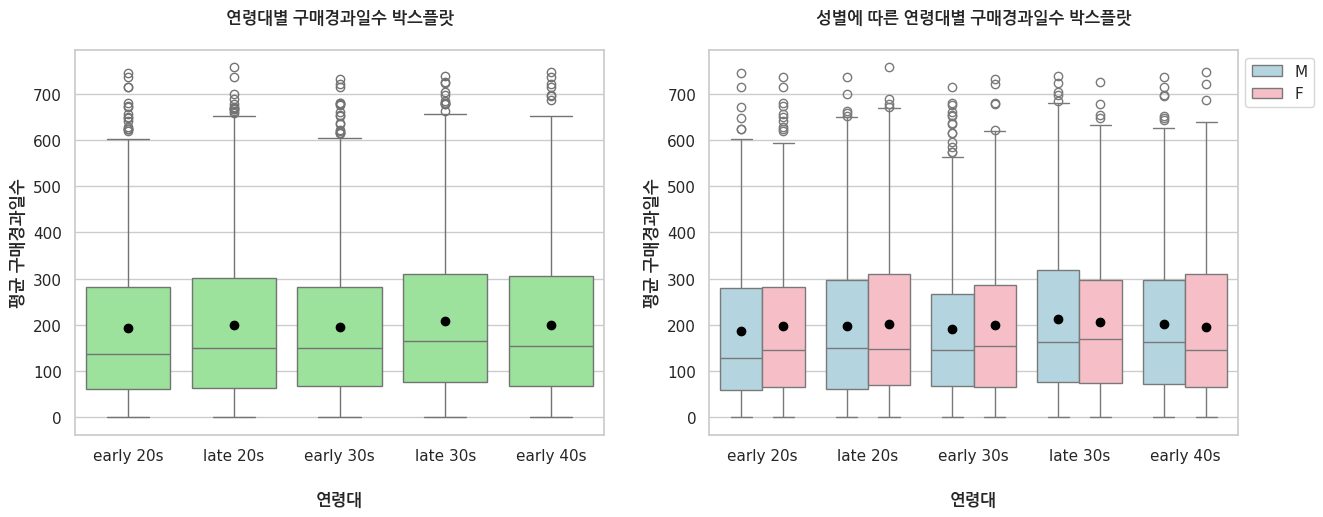

In [ ]:
# 그래프 스타일 설정
sns.set(style="whitegrid")

# 그래프 그리기
plt.figure(figsize=(15, 5))

# 첫 번째 그래프: 연령대별 구매 경과일수 박스플랏
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째
BoxPlot = sns.boxplot(x='AgeGroup', y='diff_ord_days',
                      showmeans=True, color='lightgreen',
                      meanprops={'marker': 'o', 'markerfacecolor': 'black', 'markeredgecolor': 'black'},
                      data=cust_ord_df_v2)

plt.ylabel('평균 구매경과일수', labelpad=5, fontproperties=font_properties)
plt.xlabel('연령대', labelpad=20, fontproperties=font_properties)
plt.title('연령대별 구매경과일수 박스플랏', pad=20, fontproperties=font_properties)

# 두 번째 그래프: 성별에 따른 연령대별 구매 경과일수 박스플랏
custom_palette = {'F': 'lightpink', 'M': 'lightblue'}

plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째
BoxPlot2 = sns.boxplot(x='AgeGroup', y='diff_ord_days',
                       showmeans=True,
                       meanprops={'marker': 'o', 'markerfacecolor': 'black', 'markeredgecolor': 'black'},
                       hue='gender', palette=custom_palette,
                       data=cust_ord_df_v2)

plt.ylabel('평균 구매경과일수', labelpad=5, fontproperties=font_properties)
plt.xlabel('연령대', labelpad=20, fontproperties=font_properties)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('성별에 따른 연령대별 구매경과일수 박스플랏', pad=20, fontproperties=font_properties)

# 그래프 보여주기
plt.show()

In [ ]:
cust_ord_df_v2.iloc[:3]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle,gender,dob,age,AgeGroup
0,266783,2011-09-23,2013-02-20,5,8,129,M,1974-05-01,39,early 40s
1,266784,2012-08-23,2012-12-04,3,86,51,F,1991-12-13,22,early 20s
2,266785,2011-03-15,2013-02-13,7,15,116,F,1985-06-29,28,late 20s


In [ ]:
# 연령대 별 구매주기 평균/중앙값/고객수
cust_ord_df_v2.groupby('AgeGroup')['diff_ord_days'].agg(
    mean_value = np.mean,
    median_value = np.median,
    count_value = np.size
).reset_index().sort_values(by=['mean_value'])

,AgeGroup,mean_value,median_value,count_value
0,early 20s,192.593385,138.0,514
2,early 30s,194.895216,149.5,878
4,early 40s,199.033526,155.0,865
1,late 20s,199.962244,149.0,927
3,late 30s,208.878156,165.0,911


In [ ]:
# 연령대/성별 별 구매주기 평균/중앙값/고객수
cust_ord_df_v2.groupby(['AgeGroup', 'gender'])['diff_ord_days'].agg(
    mean_value = np.mean,
    median_value = np.median,
    count_value = np.size
).reset_index().sort_values(by=['mean_value'])

,AgeGroup,gender,mean_value,median_value,count_value
1,early 20s,M,187.224335,128.0,263
5,early 30s,M,190.878319,145.5,452
8,early 40s,F,195.191142,145.0,429
3,late 20s,M,197.922756,150.0,479
0,early 20s,F,198.219124,145.0,251
4,early 30s,F,199.157277,154.5,426
2,late 20s,F,202.142857,147.5,448
9,early 40s,M,202.814220,163.0,436
6,late 30s,F,205.476190,169.0,441
7,late 30s,M,212.070213,162.5,470


> 위 **박스플롯**과 **조건별 구매경과일수를 계산한 테이블**을 살펴보면 연령대별 평균 구매일수와 중앙값 모두 유사하게 나타나지만 **20대 초반(약 6.4개월/193일)과 30대 초반(약 6.4개월/195일) 고객들의 평균 구매경과일수가 다른 연령대에 비해서 근소하게 짧음**. 또한 **20대 초반 남성(약 6.2개월/187일)과 30대 초반 남성(약 6.3개월/191일) 고객들의 평균 구매경과일수가 다른 조건들에 비해서 짧음**.



#####<font size = 4> **구매주기 박스플랏**

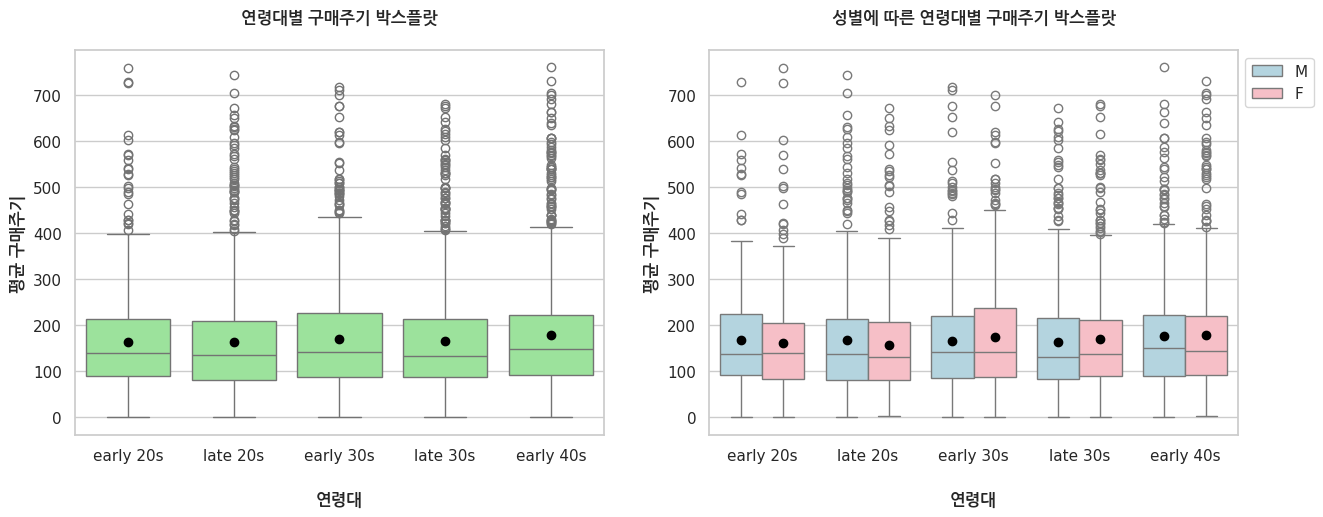

In [ ]:
# 그래프 스타일 설정
sns.set(style="whitegrid")

# 그래프 그리기
plt.figure(figsize=(15, 5))

# 첫 번째 그래프: 연령대별 구매 경과일수 박스플랏
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째
BoxPlot = sns.boxplot(x='AgeGroup', y='ord_cycle',
                      showmeans=True, color='lightgreen',
                      meanprops={'marker': 'o', 'markerfacecolor': 'black', 'markeredgecolor': 'black'},
                      data=cust_ord_df_v2)

plt.ylabel('평균 구매주기', labelpad=5, fontproperties=font_properties)
plt.xlabel('연령대', labelpad=20, fontproperties=font_properties)
plt.title('연령대별 구매주기 박스플랏', pad=20, fontproperties=font_properties)

# 두 번째 그래프: 성별에 따른 연령대별 구매 경과일수 박스플랏
custom_palette = {'F': 'lightpink', 'M': 'lightblue'}

plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째
BoxPlot2 = sns.boxplot(x='AgeGroup', y='ord_cycle',
                       showmeans=True,
                       meanprops={'marker': 'o', 'markerfacecolor': 'black', 'markeredgecolor': 'black'},
                       hue='gender', palette=custom_palette,
                       data=cust_ord_df_v2)

plt.ylabel('평균 구매주기', labelpad=5, fontproperties=font_properties)
plt.xlabel('연령대', labelpad=20, fontproperties=font_properties)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('성별에 따른 연령대별 구매주기 박스플랏', pad=20, fontproperties=font_properties)

# 그래프 보여주기
plt.show()

In [ ]:
# 연령대 별 구매주기 평균/중앙값/고객수
cust_ord_df_v2.groupby('AgeGroup')['ord_cycle'].agg(
    mean_value = np.mean,
    median_value = np.median,
    count_value = np.size
).reset_index().sort_values(by=['mean_value'])

,AgeGroup,mean_value,median_value,count_value
1,late 20s,162.905070,135.0,927
0,early 20s,164.959144,139.0,514
3,late 30s,167.055982,134.0,911
2,early 30s,170.547836,141.5,878
4,early 40s,178.532948,148.0,865


In [ ]:
# 연령대/성별 별 구매주기 평균/중앙값/고객수
cust_ord_df_v2.groupby(['AgeGroup', 'gender'])['ord_cycle'].agg(
    mean_value = np.mean,
    median_value = np.median,
    count_value = np.size
).reset_index().sort_values(by=['mean_value'])

,AgeGroup,gender,mean_value,median_value,count_value
2,late 20s,F,158.006696,132.0,448
0,early 20s,F,160.772908,141.0,251
7,late 30s,M,164.334043,132.0,470
5,early 30s,M,166.477876,141.5,452
3,late 20s,M,167.486430,138.0,479
1,early 20s,M,168.954373,137.0,263
6,late 30s,F,169.956916,138.0,441
4,early 30s,F,174.866197,141.5,426
9,early 40s,M,177.493119,150.0,436
8,early 40s,F,179.589744,145.0,429


> 위 **박스플롯**과 **조건별 구매주기를 계산한 테이블**을 살펴보면 연령대별 평균 구매주기와 중앙값 모두 유사하게 나타나지만 **20대 초반(약 5.5개월/165일)과 20대 후반(약 5.4개월/163일) 고객들의 평균 구매주기가 다른 연령대에 비해서 근소하게 짧음**. 특히 **20대 초반 여성(약 5.3개월/161일)과 20대 후반 여성(약 5.2개월/158일) 고객들의 평균 구매주기가 다른 조건들에 비해서 짧음**.


#### **Q2-2 : 재구매 유도 캠페인 진행 후, 구매 반응한 고객수 구하기**

- <font color='blue'>**[분석 전 가정]**</font> <b>2013년 2월 28일을 기준으로 <mark>구매경과일수가 30일 이상인 고객을 대상</mark>으로 재구매 유도를 위한 캠페인을 진행했음</b>

- <font color='blue'>**[분석 주제]**</font> <b><mark>2013년 12월 31일까지 구매 반응한 고객수 구하기</mark></b>
<br>
- <font color='blue'>**[분석 결과]**</font>
<ul style="list-style-type: square;">
  <li>2013년 2월 28일을 기준으로 <b><font color='brown'>구매경과일수가 30일 이상인 고객은 총 3,609명</b></font></li>
  <li>재구매 유도 캠페인 후, 재유입된 고객수는 <font color='brown'><b>총 3,045명(약 84%)</b></font></li>
</ul>


In [ ]:
cust_ord_df_v2.iloc[:2]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle,gender,dob,age,AgeGroup
0,266783,2011-09-23,2013-02-20,5,8,129,M,1974-05-01,39,early 40s
1,266784,2012-08-23,2012-12-04,3,86,51,F,1991-12-13,22,early 20s


In [ ]:
# 구매경과일수 분포 확인
cust_ord_df_v2['diff_ord_days'].describe()

count    4095.000000
mean      199.738217
std       165.190372
min         0.000000
25%        67.000000
50%       151.000000
75%       299.000000
max       757.000000
Name: diff_ord_days, dtype: float64

In [ ]:
cust_ord_df_v2.iloc[:3]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle,gender,dob,age,AgeGroup
0,266783,2011-09-23,2013-02-20,5,8,129,M,1974-05-01,39,early 40s
1,266784,2012-08-23,2012-12-04,3,86,51,F,1991-12-13,22,early 20s
2,266785,2011-03-15,2013-02-13,7,15,116,F,1985-06-29,28,late 20s


In [ ]:
count_not_gt_30, count_gt_30 = cust_ord_df_v2.groupby(cust_ord_df_v2['diff_ord_days'] >= 30).size()

print('2013년 2월 28일을 기준으로 마지막 주문일이 30일 이상인 고객수:', str(count_gt_30) + '명')

formatted_number = '{:,}'.format(count_not_gt_30)
print('2013년 2월 28일을 기준으로 마지막 주문일이 30일 미만인 고객수:', str(formatted_number) + '명')

2013년 2월 28일을 기준으로 마지막 주문일이 30일 이상인 고객수: 3609명
2013년 2월 28일을 기준으로 마지막 주문일이 30일 미만인 고객수: 486명


In [ ]:
# 전체 주문내역 객체에서 구매경과일이 30 이상인 고객들만 필터링하기
cust_ord_over30days = cust_ord_df_v2[cust_ord_df_v2['diff_ord_days'] >= 30]

In [ ]:
cust_ord_over30days.iloc[:3]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle,gender,dob,age,AgeGroup
1,266784,2012-08-23,2012-12-04,3,86,51,F,1991-12-13,22,early 20s
4,266794,2011-03-18,2012-11-27,9,93,77,F,1971-02-28,42,early 40s
6,266807,2011-10-27,2012-12-25,4,65,141,M,1988-09-13,25,late 20s


In [ ]:
# 전체 주문내역 객체에서 구매경과일이 30 이상인 고객들의 cust_id만 추출해서 리스트로 만들기
cust_ord_over30days_cust_id = cust_ord_over30days['cust_id'].tolist()

In [ ]:
len(cust_ord_over30days_cust_id)

3609

In [ ]:
# 전체 주문내역인 df 객체에서 cust_ord_over30days_cust_id에 해당되는 고객들만 필터링

df_v2 = df[df['cust_id'].isin(cust_ord_over30days_cust_id)]

print('전체 주문 내역 중 고유한 고객수:', '{:,}'.format(len(df['cust_id'].unique())), '명')
print('2013년 2월 28일을 기준을 주문한지 30일 이상된 고객수:', '{:,}'.format(len(df_v2['cust_id'].unique())), '명')

전체 주문 내역 중 고유한 고객수: 5,504 명
2013년 2월 28일을 기준을 주문한지 30일 이상된 고객수: 3,609 명


In [ ]:
df_v2.iloc[:3]

,cust_id,dob,AgeGroup,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,late 30s,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,early 40s,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
3,271544,1986-05-08,late 20s,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop


In [ ]:
cust_ord_over30days.iloc[:3]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,ord_cycle,gender,dob,age,AgeGroup
1,266784,2012-08-23,2012-12-04,3,86,51,F,1991-12-13,22,early 20s
4,266794,2011-03-18,2012-11-27,9,93,77,F,1971-02-28,42,early 40s
6,266807,2011-10-27,2012-12-25,4,65,141,M,1988-09-13,25,late 20s


In [ ]:
# 고객별 마지막 구매일 구하기
cust_ord_df_v3 = df_v2.groupby('cust_id')['tran_date'].agg(
    last_ord_date = np.max
).reset_index()

# 데이터 확인
cust_ord_df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cust_id        3609 non-null   int64         
 1   last_ord_date  3609 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 56.5 KB


In [ ]:
end_date = pd.Timestamp('2013-12-31') # 마직말 주문일

condition = (cust_ord_df_v3['last_ord_date'] <= end_date)

cust_ord_df_v3['ReturningCustomer'] = np.where(condition, 1, 0)

In [ ]:
cust_ord_df_v3['ReturningCustomer'].unique()

array([1, 0])

In [ ]:
cust_ord_df_v3['ReturningCustomer'].value_counts()

ReturningCustomer
1    3045
0     564
Name: count, dtype: int64

In [ ]:
round(cust_ord_df_v3['ReturningCustomer'].value_counts(normalize=True), 2)

ReturningCustomer
1    0.84
0    0.16
Name: proportion, dtype: float64

### **Q3 : 월 평균 매출액이 가장 높은 카테고리 찾기**


#### **Q3-1 : 2011년부터 2013년 월 평균 매출이 가장 높은 카테고리 찾기**
- <b><font color='blue'>[분석 세부조건] </font> <mark>대 카테고리를 기준으로 2011년부터 2013년까지 월 평균 매출액이 가장 높은 카테고리 찾기</b></mark>

- <font color='blue'>**[분석 결과]**</font>
<ul style="list-style-type: square;">
  <li>월 별로 매출액이 가장 높았던 prod_cat은 <b><font color='brown'>Books 카테고리</b></font> (월 평균 매출액이 3년 동안 33번 가장 높았었음/월 평균 총 매출액 380,534.41)</li>
</ul>


In [ ]:
df.iloc[:3]

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-04-01,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store


In [ ]:
# 필요한 컬럼만 선별하기
SelectedCols = df[['cust_id', 'order_status', 'transaction_id', 'tran_date',
                   'prod_cat', 'prod_subcat', 'total_amt', 'store_type']]

In [ ]:
SelectedCols.iloc[:2]

,cust_id,order_status,transaction_id,tran_date,prod_cat,prod_subcat,total_amt,store_type
0,272172,Ordered,3268991,2011-08-02,Home and kitchen,Bath,301.665,e-Shop
1,269640,Ordered,7073244,2013-05-11,Books,Academic,6121.700,MBR


In [ ]:
SelectedCols['order_status'].unique()

array(['Ordered', 'Canceled'], dtype=object)

In [ ]:
# order_status가 Ordered인 경우만 추출
SelectedCols = SelectedCols[SelectedCols['order_status'] == 'Ordered']

In [ ]:
# 월별 매출액을 계산하기 위해서 tran_date의 YYYY-MM-DD을 YYYY-MM 정보만 추출하기

SelectedCols['Year-Month'] = SelectedCols['tran_date'].dt.to_period('M')

In [ ]:
# Year-Month 컬럼 종류 살펴보기
SelectedCols['Year-Month'].unique()

<PeriodArray>
['2011-08', '2013-05', '2013-10', '2011-03', '2013-08', '2012-01', '2011-09',
 '2011-04', '2012-08', '2012-12', '2013-11', '2012-09', '2011-02', '2011-12',
 '2013-06', '2012-04', '2013-01', '2013-07', '2012-02', '2011-06', '2011-10',
 '2014-02', '2014-01', '2013-12', '2012-07', '2012-10', '2011-01', '2012-05',
 '2012-11', '2011-07', '2012-03', '2013-03', '2013-04', '2013-02', '2011-11',
 '2013-09', '2011-05', '2012-06']
Length: 38, dtype: period[M]

In [ ]:
SelectedCols['Year-Month'] = SelectedCols['Year-Month'].astype(str)

In [ ]:
# 2014년 정보는 제거하기
SelectedCols = SelectedCols[(SelectedCols['Year-Month'] != '2014-01') & (SelectedCols['Year-Month'] != '2014-02')]

In [ ]:
# 대카테고리별 월별 매출액 총합 계산하기
TotalAmt = SelectedCols.groupby(['Year-Month', 'prod_cat'])['total_amt'].sum().unstack().reset_index()

In [ ]:
TotalAmt

prod_cat,Year-Month,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
0,2011-01,28925.585,121711.330,32105.775,70779.670,22195.030,74389.705
1,2011-02,101540.660,381992.975,94620.045,292818.370,164389.745,219761.295
2,2011-03,143249.990,429060.450,236432.430,349772.280,140977.005,234766.090
3,2011-04,189743.970,435817.525,137245.420,324009.205,166832.900,263194.425
4,2011-05,94565.900,348825.295,137881.900,323479.910,145790.385,301510.300
5,2011-06,123816.355,384138.885,161136.625,264357.990,173334.720,249249.325
6,2011-07,127804.300,354237.585,196759.615,357891.820,199551.950,249061.475
7,2011-08,119127.840,335348.715,188937.320,334961.965,201232.655,245032.645
8,2011-09,127423.075,453535.095,180390.145,327413.710,253061.575,297403.015
9,2011-10,123288.165,409803.615,201734.325,356063.045,224907.280,245332.100


In [ ]:
# 월별로 총 매출액이 가장 큰 대카테고리에 하이라이트하기
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

styled_df = TotalAmt.iloc[:, 1:].style.apply(highlight_max, axis=1)

In [ ]:
styled_df

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
0,28925.585000,121711.330000,32105.775000,70779.670000,22195.030000,74389.705000
1,101540.660000,381992.975000,94620.045000,292818.370000,164389.745000,219761.295000
2,143249.990000,429060.450000,236432.430000,349772.280000,140977.005000,234766.090000
3,189743.970000,435817.525000,137245.420000,324009.205000,166832.900000,263194.425000
4,94565.900000,348825.295000,137881.900000,323479.910000,145790.385000,301510.300000
5,123816.355000,384138.885000,161136.625000,264357.990000,173334.720000,249249.325000
6,127804.300000,354237.585000,196759.615000,357891.820000,199551.950000,249061.475000
7,119127.840000,335348.715000,188937.320000,334961.965000,201232.655000,245032.645000
8,127423.075000,453535.095000,180390.145000,327413.710000,253061.575000,297403.015000
9,123288.165000,409803.615000,201734.325000,356063.045000,224907.280000,245332.100000


In [ ]:
# 카테고리별로 월별 매출이 가장 높았던 경우 세기
is_max_df = TotalAmt.iloc[:, 1:].apply(lambda row: row == row.max(), axis=1)
max_count = is_max_df.sum()
print(max_count)

prod_cat
Bags                 0
Books               33
Clothing             0
Electronics          3
Footwear             0
Home and kitchen     0
dtype: int64


In [ ]:
# 각 카테고리 별 월 평균 총 매출액 계산하기
mean_values = TotalAmt.iloc[:, 1:].mean().round(2)
formatted_mean_values = mean_values.apply(lambda x: '{:,.2f}'.format(x))
print(formatted_mean_values)

prod_cat
Bags                124,141.50
Books               380,534.41
Clothing            186,237.25
Electronics         314,451.20
Footwear            185,975.89
Home and kitchen    250,310.43
dtype: object


#####<font size = 4> **월별 매출액 선 그래프**

In [ ]:
# 컬럼명 확인하기
TotalAmt.columns

Index(['Year-Month', 'Bags', 'Books', 'Clothing', 'Electronics', 'Footwear',
       'Home and kitchen'],
      dtype='object', name='prod_cat')

In [ ]:
# 월별 매출액 plot을 그리고 위한 데이터 형태 변형 (Wide to Long form)

TotalAmt_Long = pd.melt(TotalAmt, id_vars=['Year-Month'],
                      value_vars = ['Bags', 'Books', 'Clothing', 'Electronics', 'Footwear','Home and kitchen'],
                      value_name = 'TotalAmt')

In [ ]:
TotalAmt_Long

,Year-Month,prod_cat,MeanAmt
0,2011-01,Bags,2629.598636
1,2011-02,Bags,2820.573889
2,2011-03,Bags,2469.827414
3,2011-04,Bags,3215.999492
4,2011-05,Bags,2306.485366
...,...,...,...
211,2013-08,Home and kitchen,2415.083298
212,2013-09,Home and kitchen,2567.817417
213,2013-10,Home and kitchen,2576.507143
214,2013-11,Home and kitchen,2467.567526


In [ ]:
# Period로 설정되어 있는 Year-Month 데이터 타입을 str 타입으로 변경하기
TotalAmt_Long['Year-Month'] = TotalAmt_Long['Year-Month'].astype(str)

In [ ]:
# 한국어 폰트 설정
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/content/drive/MyDrive/Colab Notebooks/font/NanumGothicBold.ttf'

# 폰트 매니저에 한국어 폰트 추가
fm.fontManager.addfont(font_path)

# 폰트 설정
font_properties = fm.FontProperties(fname=font_path)

# 기본 글꼴 설정
plt.rcParams['font.size'] = 12

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.rc('font', family=font_properties.get_name())

<Figure size 1000x500 with 0 Axes>

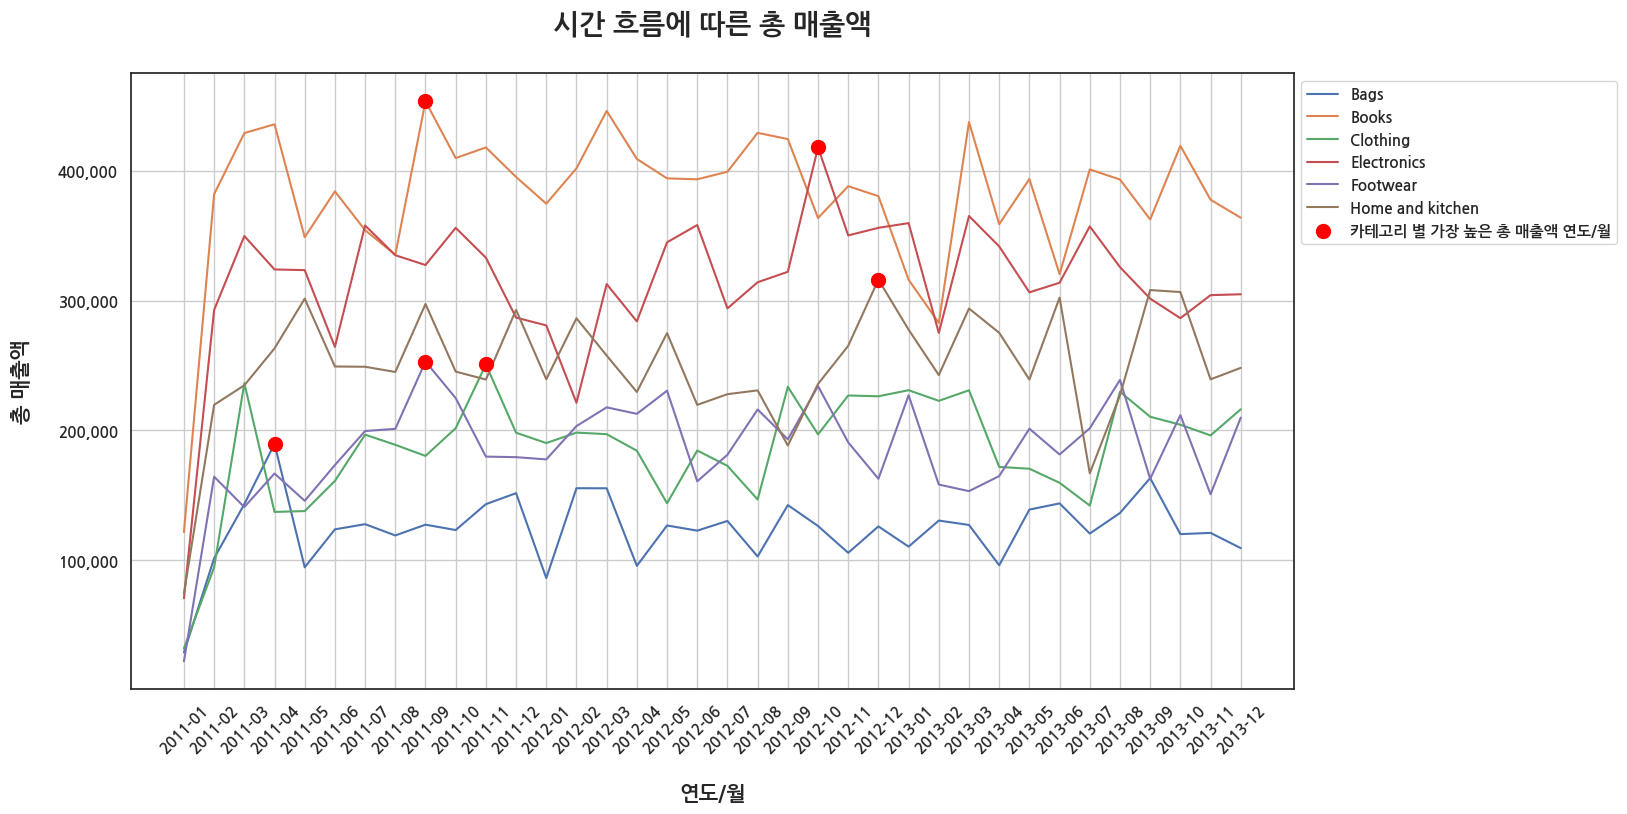

In [ ]:
# 카테고리별로 총 매출액이 가장 높았던 Year-Month에 하이라이트
import matplotlib.ticker as ticker

max_points = TotalAmt_Long.loc[TotalAmt_Long.groupby('prod_cat')['TotalAmt'].idxmax()]

sns.set_theme(rc={'figure.figsize':(15,8)})
sns.set_style("white")

# 기본 글꼴 설정
plt.rcParams['font.size'] = 15
plt.rc('font', family=font_properties.get_name())

# 천만원 단위로 값에 쉼표(,) 넣어주기
formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

sns.lineplot(x='Year-Month', y='TotalAmt', hue='prod_cat',
             data=TotalAmt_Long)

plt.scatter(max_points['Year-Month'], max_points['TotalAmt'], color='red',
            s=100, zorder=5, label='카테고리 별 가장 높은 총 매출액 연도/월')

plt.xlabel('연도/월', labelpad=20, fontsize=15)
plt.ylabel('총 매출액', labelpad=20, fontsize=15)
plt.title('시간 흐름에 따른 총 매출액', pad=30, fontsize=20)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.grid(True)
plt.show()

#### **Q3-2 : 각 카테고리별 월 평균 매출액의 분산과 표준 편차**

In [ ]:
# 각 카테고리별 월 평균 매출액의 분산 계산하기
TotalAmt.iloc[:, 1:].var().round(2)

prod_cat
Bags                7.214034e+08
Books               3.394770e+09
Clothing            1.898619e+09
Electronics         3.055795e+09
Footwear            1.624612e+09
Home and kitchen    2.066261e+09
dtype: float64

In [ ]:
# 각 카테고리별 월 평균 매출액의 표준편차 계산하기
round(TotalAmt.iloc[:, 1:].describe().loc['std'], 2)

prod_cat
Bags                26858.95
Books               58264.65
Clothing            43573.15
Electronics         55279.24
Footwear            40306.48
Home and kitchen    45456.14
Name: std, dtype: float64

#### **Q3-3 : 각 카테고리별 매출 성과 판단**

- <b><font color='blue'>[분석 조건] </font> <mark>각 카테고리에 대한 월 평균 매출액과 표준 편차를 통해 현재 해당 서비스에서의 각 카테고리별 매출 성과를 판단</mark></b>
<ul style="list-style-type: square;">
  <li><b><font color='brown'>변동계수(변동계수 = 표준편차 / 평균) 활용</b></font></li>
  <br>
  <li>평균이 높고, 표준편차도 높은 경우 해당 상품이 안정적으로 성과를 내는 것인지 판단하는 데 한계가 있기때문에 <b><font color='brown'>평균값 크기에 따른 scale 차이를 보정하여 변동성을 살펴볼 수 있는 변동계수(상대적 표준편차)를 활용하여 매출성과를 판단하기로 함 </font></b></li>
  <br>
  <li><b><font color='brown'>변동계수가 낮을 수록 변동성이 낮음.</font></b> 즉, 안정적으로 평균값이 나온다는 것을 의미</li>
</ul>

<br>

- <font color='blue'>**[분석 결과]**</font>
<ul style="list-style-type: square;">
  <b><font color = 'blue'>[월 평균 총 매출액 결과]</font></b>

  <li>월 별로 총 매출액을 살펴보니, <b><font color='brown'>Books 카테고리</font></b>가 약 380,534.41으로 <b><font color='brown'>가장 높았고</font></b>, <b><font color='brown'>Bags 카테고리</font></b>가 약 124,141.50로 <b><font color='brown'>가장 낮았음</font></b></li>
  <br>
  <b><font color = 'blue'>[상대적 표준편차인 변동계수 결과]</font></b>

  <li>월 평균 총 매출액만 가지고는 매출성과 판단의 한계가 있기때문에 <b><font color='brown'>변동계수</font></b>를 살펴보니, <b><font color='brown'>Books 카테고리</font></b>는 월 평균 총 매출액 뿐만 아니라, 변동계수(15.31)도 가장 낮음. 즉, <b><font color='brown'>꾸준히 안정적으로 높은 매출액을 보이는 카테고리로 판단할 수 있음. </font></b>
  <br><br>
   <li>이와 반면 Bags, Footwear, Clothing과 같은 <b><font color='brown'>패션 카테고리는</font> <font color='brown'>변동 폭이 크기 때문에 해당 카테고리의 수요가 떨어지는 시즌에 다른 카테고리와의 마케팅 기획 조율을 통해 전체 서비스의 매출 성장의 안정성을 높이는 방법이 필요하다고 판단됨</font></b></li>
  
</ul>

In [ ]:
# 각 카테고리별 월 평균 매출액의 평균 계산 후, 판다스 테이블 만들기
MeanPerProd = pd.DataFrame(round(TotalAmt.iloc[:, 1:].describe().loc['mean'], 2).reset_index())
MeanPerProd.columns = ['prod_cat', 'mean']
MeanPerProd.sort_values('mean', ascending=False)

,prod_cat,mean
1,Books,380534.41
3,Electronics,314451.20
5,Home and kitchen,250310.43
2,Clothing,186237.25
4,Footwear,185975.89
0,Bags,124141.50


In [ ]:
# 각 카테고리별 월 평균 매출액의 표준편차 계산 후, 판다스 테이블 만들기
StdPerProd = pd.DataFrame(round(TotalAmt.iloc[:, 1:].describe().loc['std'], 2).reset_index())
StdPerProd.columns = ['prod_cat', 'std']
StdPerProd.sort_values('std', ascending=False)

,prod_cat,std
1,Books,58264.65
3,Electronics,55279.24
5,Home and kitchen,45456.14
2,Clothing,43573.15
4,Footwear,40306.48
0,Bags,26858.95


In [ ]:
CalculatedDf = pd.concat([MeanPerProd, StdPerProd[['std']]], axis=1)

In [ ]:
CalculatedDf.sort_values('mean', ascending=False)

,prod_cat,mean,std
1,Books,380534.41,58264.65
3,Electronics,314451.20,55279.24
5,Home and kitchen,250310.43,45456.14
2,Clothing,186237.25,43573.15
4,Footwear,185975.89,40306.48
0,Bags,124141.50,26858.95


In [ ]:
# 변동계수 계산하기
CalculatedDf['cv'] = round(CalculatedDf['std']/CalculatedDf['mean']*100, 2)
CalculatedDf.sort_values('cv', ascending=False)

,prod_cat,mean,std,cv
2,Clothing,186237.25,43573.15,23.40
4,Footwear,185975.89,40306.48,21.67
0,Bags,124141.50,26858.95,21.64
5,Home and kitchen,250310.43,45456.14,18.16
3,Electronics,314451.20,55279.24,17.58
1,Books,380534.41,58264.65,15.31


> <mark>**평균 매출액만 가지고는 매출성과 판단의 한계가 있기 때문에 변동계수를 계산하여 살펴봄**</mark>
<br><br>
**Books 카테고리의 경우 월별 평균 총 매출액(380,534.41)이 가장 높지만 표준편차(58,264.65)도 가장 높음.** 즉, Books 카테고리가 안정적으로 매출을 잘 내는 카테고리라고 바로 판단할 수 없음.
<br><br>
> 평균값이 높아서 표준편차도 높은 것인지를 판단하기 위해서 <b>상대적인 표준편차인 변동계수
를 계산</b>함.
<br><br>
<b>Books 카테고리</b>는 평균 총 매출액(380,534.41)이 가장 높고, 변동계수(15.31)는 가장 낮음. 또한, <b>Electonics 카테고리</b>도 평균 총 매출액(314,451.20)도 두 번재로 높고, 변동계수(17.58)도 두 번째로 낮음. 즉, <b><font color='brown'>Books와 Electronics 카테고리는 꾸준히 안정적으로 높은 매출액을 보이는 카테고리로 판단할 수 있음.</font></b>
<br><br>
Bags, Footwear, Clothing과 같은 <b><font color='brown'>패션 카테고리는 변동 폭이 크기 때문에 해당 카테고리의 수요가 떨어지는 시즌에 다른 카테고리와의 마케팅 기획을 통해 전체 서비스의 매출 성장의 안정성을 높이는 방법이 필요하다고 판단됨.</font></b>

## **[3] 가설 설정 및 검증**

### **[주제 1] 매출 관점에서 카테고리별 매출 성장 방안 모색**
- <b><font color='blue'>[분석 주제] </font> <mark>Z 차트를 이용한 카테고리별 매출 트렌드 분석</b></mark>

- <b><font color='blue'>[분석 결과] </font>
<ul>
  <li><b><font color='brown'>Books, Electronics, Footwear 카테고리는 하향세</b></font></li>
  <ul>
  <li><font color='black'>Books와 Electronics 카테고리는 다른 카테고리에 비해서 매출이 높은 편이기 때문에 매출 하락 감소 원인을 파악하는 것이 중요! </font></li></ul>
  <br>
  <li><b><font color='brown'>Clothing 카테고리는 안정권</b></font></li>
  <ul>
  <li><font color='black'>현재 안정적으로 매출이 나오기 때문에 계속 주시하면서 매출이 떨어지지 않게 하고, Clothing 카테고리 중에서도 잘 팔리는 제품을 파악하여 매출을 향상 시킬 수 있도록 하는 것이 필요 </font></li></ul>

  <br>
  <li><b><font color='brown'>Bags, Home and kitchen 카테고리는 상승세</b></font></li>
  <ul>
  <li><font color='black'>Bags와 Home and kitchen 카테고리는 매출이 상승하고 있는 추세인데 이것이 특정 상품이 인기가 있어서 증가한 것인지 아닌지 파악 필요 </font></li>
  <li><font color='black'>만약 특정 상품으로 인한 것이라면 해당 상품의 재고 또는 프로모션을 늘려서 매출을 더 향상 시킬 수 있도록 하는 것이 필요 </font></li></ul>
</ul>

#### **Z-차트**

In [ ]:
TotalAmt_Long

,Year-Month,prod_cat,TotalAmt
0,2011-01,Bags,28925.585
1,2011-02,Bags,101540.660
2,2011-03,Bags,143249.990
3,2011-04,Bags,189743.970
4,2011-05,Bags,94565.900
...,...,...,...
211,2013-08,Home and kitchen,227017.830
212,2013-09,Home and kitchen,308138.090
213,2013-10,Home and kitchen,306604.350
214,2013-11,Home and kitchen,239354.050


In [ ]:
z_chart_df = TotalAmt_Long

In [ ]:
### Bags 카테고리로 예시 코드 작성

# 카테고리별 df 만들기
cate_chart_df = z_chart_df[z_chart_df['prod_cat'] == 'Bags']

# 1. 2013년 1월부터 12월까지의 데이터 필터링
filtered_df = cate_chart_df[(cate_chart_df['Year-Month'] >= '2013-01') & (cate_chart_df['Year-Month'] <= '2013-12')]

# 2. 각 월별 매출액 계산
monthly_sales = filtered_df.pivot_table(values='TotalAmt', index='Year-Month', aggfunc='sum', fill_value=0)

# 3. 이동합계 (rolling sum) 계산
rolling_sum = {}
for i in range(1, 13):
    rolling_sum[f'2013-{i:02}'] = cate_chart_df[cate_chart_df['Year-Month'].between(f'2012-{i+1:02}', f'2013-{i:02}')].groupby('prod_cat')['TotalAmt'].sum()

rolling_sum_df = pd.DataFrame(rolling_sum)
rolling_sum_df.reset_index(inplace=True)
rolling_sum_long = pd.melt(rolling_sum_df, id_vars=['prod_cat'], var_name='Year-Month', value_name='TotalAmt')

# 6. 누적합계 계산
cum_sum = monthly_sales['TotalAmt'].cumsum()

# 7. 새로운 데이터프레임으로 할당
result_df = pd.DataFrame({
    'ord_ym': monthly_sales.index,
    'monthly_sales': monthly_sales['TotalAmt'].values,
    'running_sales': rolling_sum_long['TotalAmt'].values,
    'cum_sales': cum_sum.values
})

# 결과 데이터프레임 출력
result_df

,ord_ym,monthly_sales,running_sales,cum_sales
0,2013-01,110505.525,1500723.705,110505.525
1,2013-02,130581.165,1475803.745,241086.690
2,2013-03,127212.020,1447567.680,368298.710
3,2013-04,96147.155,1448027.360,464445.865
4,2013-05,139039.940,1460263.025,603485.805
5,2013-06,143814.645,1481256.920,747300.450
6,2013-07,120583.125,1471559.440,867883.575
7,2013-08,136412.250,1505051.990,1004295.825
8,2013-09,163286.955,1525822.675,1167582.780
9,2013-10,120147.755,1519570.585,1287730.535


<Figure size 1000x1000 with 0 Axes>

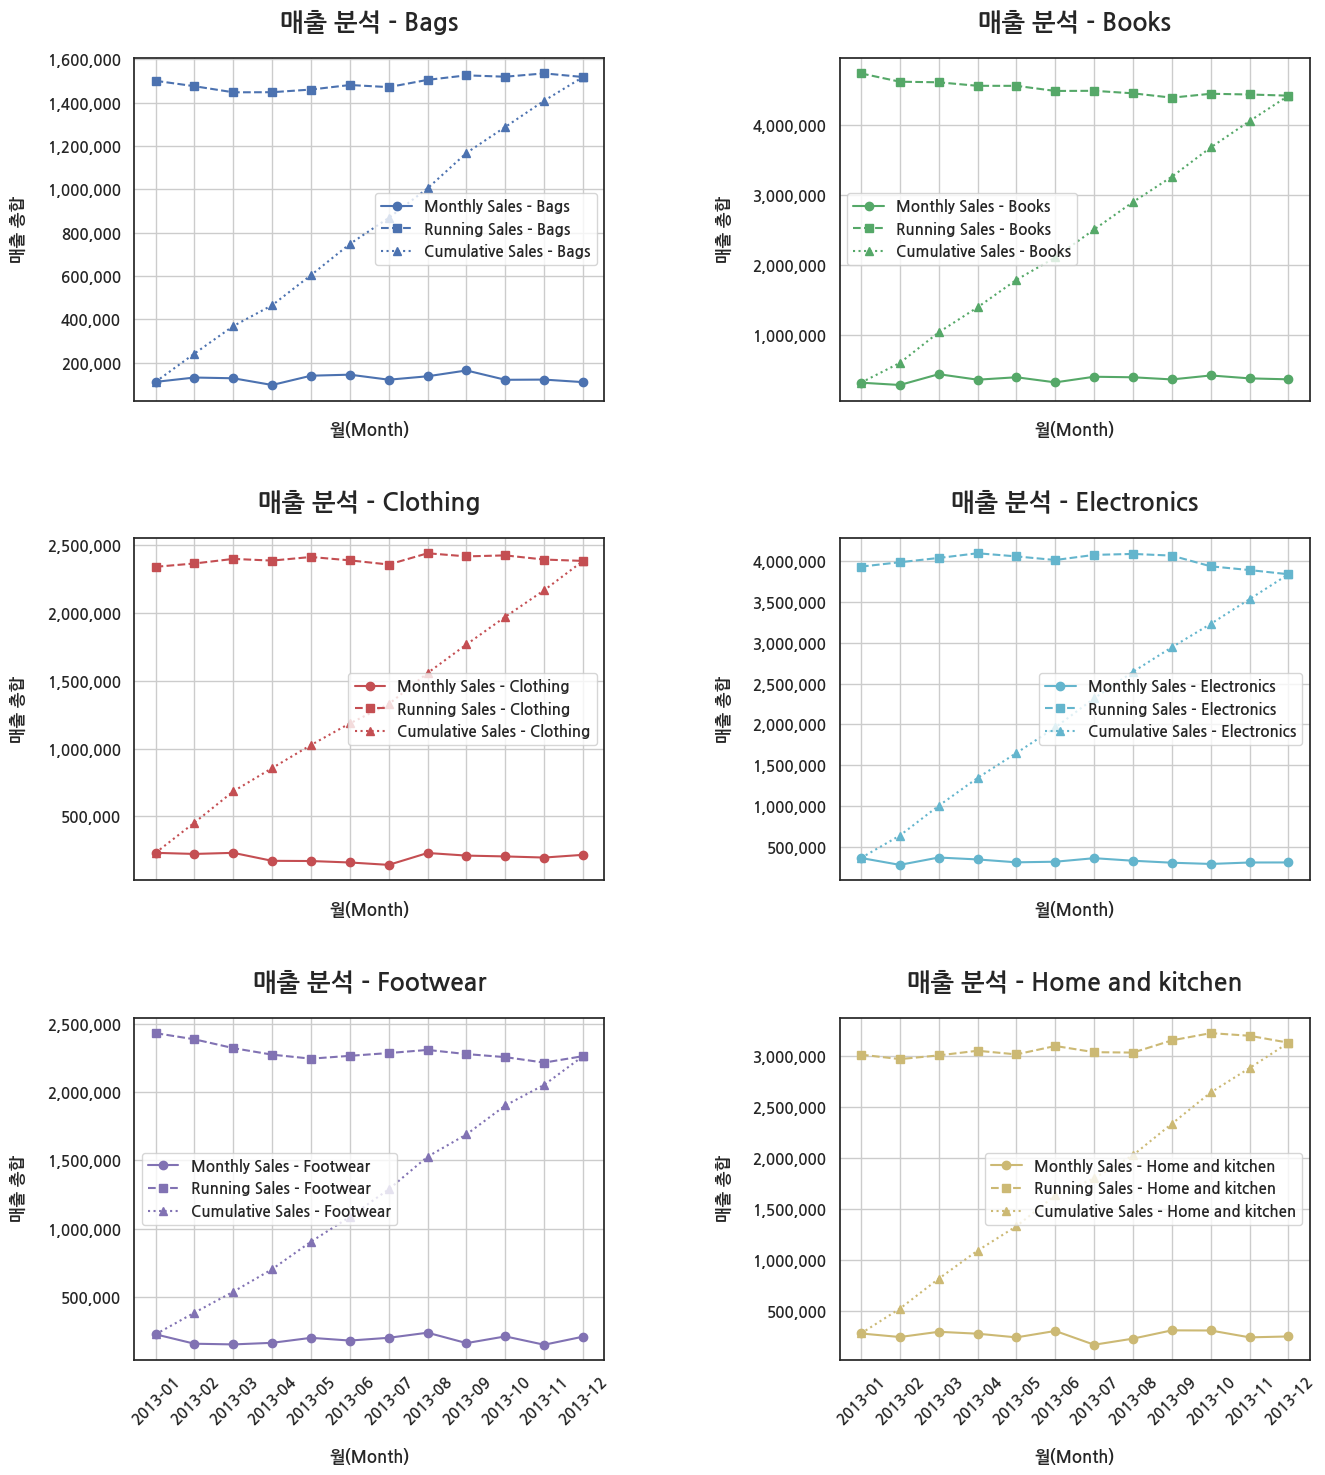

In [ ]:
# Z-차트 그리기 (2 X 3으로 표시)
from matplotlib.ticker import FuncFormatter

# 카테고리 목록
categories = z_chart_df['prod_cat'].unique()

# 그래프를 그릴 색상 목록
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 그래프 초기화
plt.figure(figsize=(10, 10))
fig, axs = plt.subplots(3, 2, figsize=(13,15), sharex=True)

# 각 카테고리의 plot을 저장할 빈 리스트
category_plots = []


# 각 카테고리에 대한 라인 차트 그리기
for i, category in enumerate(categories):
    # 카테고리별 df 만들기
    cate_chart_df = z_chart_df[z_chart_df['prod_cat'] == category]

    # 2013년 1월부터 12월까지의 데이터 필터링
    filtered_df = cate_chart_df[(cate_chart_df['Year-Month'] >= '2013-01') & (cate_chart_df['Year-Month'] <= '2013-12')]

    # 각 월별 매출액 계산
    monthly_sales = filtered_df.pivot_table(values='TotalAmt', index='Year-Month', aggfunc='sum', fill_value=0)

    # 이동합계 (rolling sum) 계산
    rolling_sum = {}
    for n in range(1, 13):
        rolling_sum[f'2013-{n:02}'] = cate_chart_df[cate_chart_df['Year-Month'].between(f'2012-{n+1:02}', f'2013-{n:02}')].groupby('prod_cat')['TotalAmt'].sum()

    rolling_sum_df = pd.DataFrame(rolling_sum)
    rolling_sum_df.reset_index(inplace=True)
    rolling_sum_long = pd.melt(rolling_sum_df, id_vars=['prod_cat'], var_name='Year-Month', value_name='TotalAmt')

    # 6. 누적합계 계산
    cum_sum = monthly_sales['TotalAmt'].cumsum()

    # 7. 새로운 데이터프레임으로 할당
    result_df = pd.DataFrame({
        'ord_ym': monthly_sales.index,
        'monthly_sales': monthly_sales['TotalAmt'].values,
        'running_sales': rolling_sum_long['TotalAmt'].values,
        'cum_sales': cum_sum.values
    })

    # 라인 차트 그리기
    row = i // 2
    col = i % 2
    axs[row, col].plot(result_df['ord_ym'], result_df['monthly_sales'], label=f'Monthly Sales - {category}', color=colors[i], linestyle='-', marker='o')
    axs[row, col].plot(result_df['ord_ym'], result_df['running_sales'], label=f'Running Sales - {category}', color=colors[i], linestyle='--', marker='s')
    axs[row, col].plot(result_df['ord_ym'], result_df['cum_sales'], label=f'Cumulative Sales - {category}', color=colors[i], linestyle=':', marker='^')

    # 각 subplot에 속성 설정
    axs[row, col].set_title(f'매출 분석 - {category}', pad=20, size=18)
    axs[row, col].set_xlabel('월(Month)', labelpad=15)
    axs[row, col].set_ylabel('매출 총합', labelpad=15)
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].tick_params(axis='x', rotation=45)

# 전체 그래프 속성 설정
plt.tight_layout()

# y축 전체 자릿수 표시 설정
for ax_row in axs:
    for ax in ax_row:
        formatter = ticker.StrMethodFormatter("{x:,.0f}")
        ax.yaxis.set_major_formatter(formatter)

# 그래프 표시
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

### **[주제 2] 고객 관점에서 구매 활동성 증대 방안**
- <b><font color='blue'>[분석 주제] </font> <mark>코호트 분석을 통한 구매 활동성 측정</b></mark>

- <font color='blue'>**[분석 결과]**</font>
<ul style="list-style-type: square;">
  <b><font color = 'blue'>[신규 고객 및 재주문 고객수 파악을 위한 코호트 분석]</font></b>

  <li><b><font color='brown'>2012년부터 2013년까지 신규 유입자수가 굉장히 가파르게 하락하고 있음. 고객들이 왜 더 이상 본사의 제품을 주문 안하는지 원인 파악이 시급</font></b></li>
  <br>
  <b><font color = 'blue'>[고객 유지율 분석을 위한 코호트 분석]</font></b>

  <li><b><font color='brown'>약 10% 내외의 월별 고객 유지율</font></b>이 지속됨</li>

  <li>특정 시즌에 고객 유지율의 변화 차이가 크지 않지만, (다른 연도/월과 상대적으로 비교했을 때) <b><font color='brown'>2013년 6월에 첫 주문을 한 고객들의 한달 뒤 재주문을 많이 함(고객 유지율 :19.8%)</font></b></li>

  <li><b><font color='brown'>다른 시점에 비해서 2013년 6월에 어떤 프로모션이나 마케팅을 했는지 살펴보면 다른 시점의 고객 유지율을 좀 더 높일 수 있는 방법을 찾을 수도 있을 것이라 예상됨</font></b></li>

  <br>
  <b><font color = 'blue'>[고객 유지율 커브(리텐션 커브) 결과]</font></b>
  <li><b><font color='brown'>일회성의 주문이 많은 것</font></b>으로 보임. 고객이 지속적으로 주문할 수 있는 방안 모색이 필요</li>
  
</ul>

#### **신규 고객 및 재주문 고객수 파악을 위한 코호트 분석**

In [369]:
# 필요한 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/DataDreamworks/패스트캠퍼스/커머스/class01/data/merge_trans_cust_prod_240327.csv')
df.iloc[:2]

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR


In [370]:
# object 타입의 tran_date 컬럼을 데이트 타입으로 변경하기
df['tran_date'] = pd.to_datetime(df['tran_date'])

In [371]:
# 구매확정된 데이터를 기준으로 분석 진행
confirmed_df = df[df['confirmed_yn'] == 1]

In [372]:
print(f"원본 데이터 행 수 : {len(df):,}(개)")
print(f"Confirmed 데이터만 필터한 행 수 : {len(confirmed_df):,}(개)")

원본 데이터 행 수 : 22,933(개)
Confirmed 데이터만 필터한 행 수 : 18,819(개)


In [373]:
confirmed_df.iloc[:2]

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR


In [374]:
# 리텐션을 측정하기 위한 데이터 전처리
retention_base = confirmed_df[['cust_id', 'transaction_id', 'tran_date']].drop_duplicates()
retention_base['ord_ym'] = retention_base['tran_date'].dt.to_period('M')
retention_base.head()

,cust_id,transaction_id,tran_date,ord_ym
0,272172,3268991,2011-08-02,2011-08
1,269640,7073244,2013-05-11,2013-05
2,272671,10861359,2013-10-25,2013-10
3,271544,15741026,2011-03-28,2011-03
4,273203,16165359,2013-08-01,2013-08


In [375]:
# 2012년과 2013년 데이터만 분석 데이터에 포함
retention_base = retention_base[retention_base['tran_date'].between(pd.Timestamp('2012-01-01'), pd.Timestamp('2013-12-31'))]

print(min(retention_base['tran_date'].unique()))
print(max(retention_base['tran_date'].unique()))

2012-01-01 00:00:00
2013-12-31 00:00:00


In [376]:
retention_base.iloc[:2]

,cust_id,transaction_id,tran_date,ord_ym
1,269640,7073244,2013-05-11,2013-05
2,272671,10861359,2013-10-25,2013-10


In [377]:
# 각 고객들이 처음 주문한 연도/월 정보 추가
retention_base['cohort_month'] = retention_base.groupby('cust_id')['ord_ym'].transform('min')

In [378]:
# 주문별로 고객이 주문한 연도/월이 처음 주문한 연도/월에서 얼마나 경과했는지 계산
# difference_in_months = (주문한 연도/월 - 고객이 처음 주문한 연도/월)
retention_base['cohort_size(month)'] = (retention_base['ord_ym'].dt.year - retention_base['cohort_month'].dt.year) * 12 + \
                                          (retention_base['ord_ym'].dt.month - retention_base['cohort_month'].dt.month)

In [379]:
retention_base.iloc[:3]

,cust_id,transaction_id,tran_date,ord_ym,cohort_month,cohort_size(month)
1,269640,7073244,2013-05-11,2013-05,2012-06,11
2,272671,10861359,2013-10-25,2013-10,2013-08,2
4,273203,16165359,2013-08-01,2013-08,2012-06,14


In [383]:
cohort_counts = retention_base.groupby(['cohort_month', 'cohort_size(month)'])['cust_id'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns={'cust_id':'users'}) \
                                .sort_values(by=['cohort_month'])

cohort_counts_df

users
cohort_month cohort_size(month)       
2012-01      0                     487
             23                     47
             22                     44
             21                     46
             20                     40
...                                ...
2013-10      1                       3
             2                       7
2013-11      1                       7
             0                      62
2013-12      0                      57

[300 rows x 1 columns]

In [402]:
# retention 테이블 생성
monthly_pivot_count = pd.pivot_table(data=cohort_counts_df, index='cohort_month', columns='cohort_size(month)', values='users')
monthly_pivot_count

cohort_size(month),0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort_month,,,,,,,,,,,,,,,,,,,,,
2012-01,487.0,45.0,43.0,53.0,40.0,43.0,36.0,38.0,54.0,48.0,...,57.0,40.0,43.0,42.0,43.0,32.0,40.0,46.0,44.0,47.0
2012-02,412.0,38.0,41.0,44.0,24.0,34.0,38.0,41.0,45.0,37.0,...,35.0,33.0,33.0,28.0,42.0,40.0,35.0,35.0,33.0,NaN
2012-03,414.0,39.0,39.0,31.0,28.0,30.0,34.0,35.0,39.0,40.0,...,36.0,29.0,36.0,35.0,43.0,36.0,36.0,40.0,NaN,NaN
2012-04,356.0,32.0,32.0,27.0,30.0,26.0,39.0,31.0,36.0,29.0,...,31.0,37.0,39.0,24.0,38.0,32.0,33.0,NaN,NaN,NaN
2012-05,347.0,31.0,33.0,27.0,27.0,23.0,35.0,29.0,32.0,41.0,...,24.0,27.0,37.0,38.0,26.0,24.0,NaN,NaN,NaN,NaN
2012-06,297.0,20.0,26.0,23.0,20.0,21.0,23.0,29.0,24.0,37.0,...,34.0,26.0,21.0,26.0,27.0,NaN,NaN,NaN,NaN,NaN
2012-07,300.0,30.0,26.0,25.0,22.0,28.0,27.0,21.0,22.0,28.0,...,23.0,34.0,22.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2012-08,255.0,25.0,26.0,20.0,20.0,23.0,19.0,20.0,24.0,24.0,...,23.0,29.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09,235.0,25.0,20.0,20.0,19.0,19.0,21.0,24.0,23.0,19.0,...,23.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
# 시각화하기
# datetime 형식의 index를 str 타입으로 바꾸기
monthly_pivot_count.index = monthly_pivot_count.index.astype(str)

fig = px.imshow(monthly_pivot_count, text_auto=':,', color_continuous_scale='Burg')

fig.update_layout(
    plot_bgcolor='white',
    title = dict(
        text = '<b>신규 고객수 및 재주문 고객수 파악을 위한 코호트 분석</b>',
        font = dict(
            size=25,
            color='black'
        ),
        x=0.5,
        y=0.95
    ),

    xaxis=dict(
        title = dict(
        text = '<b>코호트 인덱스</b>',
        font = dict(
            size = 15,
            color = 'black'
        )
        ),

        showline=True,
        linewidth=1,
        linecolor='grey',
        mirror=True
    ),
    yaxis=dict(
        title = dict(
        text = '<b>연도/월</b>',
        font = dict(
            size = 15,
            color = 'black'
        )
        ),
        showline=True,
        linewidth=1,
        linecolor='grey',
        mirror=True
    )
)

fig.update_xaxes(
    tickmode='array',
    tickvals=list(range(25)),
    showgrid=True,
    gridcolor='lightgrey',
    gridwidth=1
)


fig.update_yaxes(
    showgrid=True,
    gridcolor='lightgrey',
    gridwidth=1
)


fig.show()

> 위 **연도/월 별 구매자수에 따른 코호트 분석 결과**를 살펴보면, 2012년 초기에 비해서 **신규 유입자수가 굉장히 가파르게 줄어들고 있다**는 것을 알 수 있음.

#### **고객 유지율 분석을 위한 코호트 분석**

In [412]:
cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_month"])["users"].transform("max")

In [414]:
monthly_pivot_retention = cohort_counts_df.pivot_table(index='cohort_month', columns = 'cohort_size(month)', values = 'retention_rate')

In [415]:
monthly_pivot_retention

cohort_size(month),0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort_month,,,,,,,,,,,,,,,,,,,,,
2012-01,1.0,0.092402,0.088296,0.108830,0.082136,0.088296,0.073922,0.078029,0.110883,0.098563,...,0.117043,0.082136,0.088296,0.086242,0.088296,0.065708,0.082136,0.094456,0.090349,0.096509
2012-02,1.0,0.092233,0.099515,0.106796,0.058252,0.082524,0.092233,0.099515,0.109223,0.089806,...,0.084951,0.080097,0.080097,0.067961,0.101942,0.097087,0.084951,0.084951,0.080097,NaN
2012-03,1.0,0.094203,0.094203,0.074879,0.067633,0.072464,0.082126,0.084541,0.094203,0.096618,...,0.086957,0.070048,0.086957,0.084541,0.103865,0.086957,0.086957,0.096618,NaN,NaN
2012-04,1.0,0.089888,0.089888,0.075843,0.084270,0.073034,0.109551,0.087079,0.101124,0.081461,...,0.087079,0.103933,0.109551,0.067416,0.106742,0.089888,0.092697,NaN,NaN,NaN
2012-05,1.0,0.089337,0.095101,0.077810,0.077810,0.066282,0.100865,0.083573,0.092219,0.118156,...,0.069164,0.077810,0.106628,0.109510,0.074928,0.069164,NaN,NaN,NaN,NaN
2012-06,1.0,0.067340,0.087542,0.077441,0.067340,0.070707,0.077441,0.097643,0.080808,0.124579,...,0.114478,0.087542,0.070707,0.087542,0.090909,NaN,NaN,NaN,NaN,NaN
2012-07,1.0,0.100000,0.086667,0.083333,0.073333,0.093333,0.090000,0.070000,0.073333,0.093333,...,0.076667,0.113333,0.073333,0.070000,NaN,NaN,NaN,NaN,NaN,NaN
2012-08,1.0,0.098039,0.101961,0.078431,0.078431,0.090196,0.074510,0.078431,0.094118,0.094118,...,0.090196,0.113725,0.094118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09,1.0,0.106383,0.085106,0.085106,0.080851,0.080851,0.089362,0.102128,0.097872,0.080851,...,0.097872,0.080851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
# 시각화하기
# datetime 형식의 index를 str 타입으로 바꾸기
monthly_pivot_retention.index = monthly_pivot_retention.index.astype(str)

fig = px.imshow(monthly_pivot_retention, text_auto='.1%', color_continuous_scale='Burg')

fig.update_layout(
    plot_bgcolor='white',
    title = dict(
        text = '<b>고객 유지율 분석을 위한 코호트 분석</b>',
        font = dict(
            size=25,
            color='black'
        ),
        x=0.5,
        y=0.95
    ),

    xaxis=dict(
        title = dict(
        text = '<b>코호트 인덱스</b>',
        font = dict(
            size = 15,
            color = 'black'
        )
        ),

        showline=True,
        linewidth=1,
        linecolor='grey',
        mirror=True
    ),
    yaxis=dict(
        title = dict(
        text = '<b>연도/월</b>',
        font = dict(
            size = 15,
            color = 'black'
        )
        ),
        showline=True,
        linewidth=1,
        linecolor='grey',
        mirror=True
    )
)

fig.update_xaxes(
    tickmode='array',
    tickvals=list(range(25)),
    showgrid=True,
    gridcolor='lightgrey',
    gridwidth=1
)


fig.update_yaxes(
    showgrid=True,
    gridcolor='lightgrey',
    gridwidth=1
)


fig.show()

> 위 **고객 유지율 분석을 위한 코호트 분석 결과**를 통해 데이터를 살펴보면 대략 10% 내외의 월별 고객 유지율이 보임
<br><br>
또한, 특정 시즌에 고객 유지율의 변화 차이가 크지 않지만, (다른 연도/월에 비해서 상대적으로) 2013년 6월에 첫 주문을 한 고객들이 한달 뒤 재주문을 많이 함(19.8%). 그 이후 고객 유지율이 하락세를 보이다가 2013년 12월에 다시 회복(13.2%)된 것을 볼 수 있음.

#### **리텐션 커브**

In [418]:
cohort_counts_df

users  retention_rate
cohort_month cohort_size(month)                       
2012-01      0                     487        1.000000
             23                     47        0.096509
             22                     44        0.090349
             21                     46        0.094456
             20                     40        0.082136
...                                ...             ...
2013-10      1                       3        0.037975
             2                       7        0.088608
2013-11      1                       7        0.112903
             0                      62        1.000000
2013-12      0                      57        1.000000

[300 rows x 2 columns]

In [419]:
retention_curve = cohort_counts_df.groupby('cohort_size(month)')[['retention_rate']].mean().reset_index()
retention_curve

,cohort_size(month),retention_rate
0,0,1.000000
1,1,0.097491
2,2,0.096687
3,3,0.078071
4,4,0.084651
5,5,0.082147
6,6,0.085113
7,7,0.086082
8,8,0.093502
9,9,0.096018


In [423]:
# 시각화
fig = px.line(data_frame = retention_curve, x='cohort_size(month)', y='retention_rate', title = 'Retention Curve')
fig.update_yaxes(tickformat='.0%')

fig.update_layout(
    plot_bgcolor='white',
    title = dict(
        text = '<b>리텐션 커브</b>',
        font = dict(
            size=25,
            color='black'
        ),
        x=0.5,
        y=0.95
    ),

    xaxis=dict(
        title = dict(
        text = '<b>코호트 인덱스</b>',
        font = dict(
            size = 15,
            color = 'black'
        )
        ),

        showline=True,
        linewidth=1,
        linecolor='grey',
        mirror=True
    ),
    yaxis=dict(
        title = dict(
        text = '<b>고객 유지율</b>',
        font = dict(
            size = 15,
            color = 'black'
        )
        ),
        showline=True,
        linewidth=1,
        linecolor='grey',
        mirror=True
    )
)

fig.update_xaxes(
    tickmode='array',
    tickvals=list(range(25)),
    showgrid=True,
    gridcolor='lightgrey',
    gridwidth=1
)


fig.update_yaxes(
    showgrid=True,
    gridcolor='lightgrey',
    gridwidth=1
)


fig.show()

> 위 **고객 리텐션 커브**를 살펴보면 **일회성의 주문이 많은 것**으로 보임. 고객이 지속적으로 주문할 수 있는 방안을 모색해야할 것으로 보임